In [93]:
import logging

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation, binary_fill_holes
from skimage.morphology import remove_small_objects, watershed
from skimage.segmentation import clear_border
from spine_detector.utils import load_mri, load_mri_research, rescale_original_image

from spine_detector.constants import add_console_handler, set_log_level
from spine_detector.core import EdgeFilter, AdaptiveThresholdFilter

In [2]:
add_console_handler()
set_log_level(logging.DEBUG)

In [49]:
loaded = np.load('../tst_for_remove_small_lines.npz', allow_pickle=True)
stage_params = loaded.get('stage_params').item()['filtration']
original_data = loaded.get('original_data')
original_data = np.array([rescale_original_image(array) for array in original_data])

small_filter = EdgeFilter()
small_filter.set_original_data(original_data)
small_filter.update_filtration(stage_params['small_filter'])
t_filter = AdaptiveThresholdFilter()
t_filter.set_original_data(original_data)
t_filter.update_filtration(stage_params['threshold_filter'])

result_mask_bool = small_filter.get_filtered_mask() * t_filter.get_filtered_mask()

[INFO] 2020-05-18 23:08:48,172 core.py:update_filtration:54: Run filtration with new params {'gamma': 0.75, 'k_min': 32.54, 'alpha': 0.2, 'obj_size': 35, 'hole_size': 50}
[DEBUG] 2020-05-18 23:08:48,260 utils.py:wrapper_timer:62: Start get_gradient
[DEBUG] 2020-05-18 23:08:48,632 utils.py:wrapper_timer:67: Finished get_gradient in 0:00:00.371004
[INFO] 2020-05-18 23:08:48,733 core.py:update_filtration:123: {'gamma': 0.51, 'abs_min': 0.0, 'edge_min': 0.52, 'edge_max': 1.46, 'hole_size': 1, 'x': 3, 'y': 11, 'z': 11}
[DEBUG] 2020-05-18 23:08:48,835 utils.py:wrapper_timer:62: Start box_filtering_via_gauss
[INFO] 2020-05-18 23:08:48,836 gradient.py:box_filtering_via_gauss:76: Degree 1
[DEBUG] 2020-05-18 23:08:49,019 utils.py:wrapper_timer:67: Finished box_filtering_via_gauss in 0:00:00.182510
[INFO] 2020-05-18 23:08:49,046 core.py:update_filtration:138: 0.0  1.3793352431272992


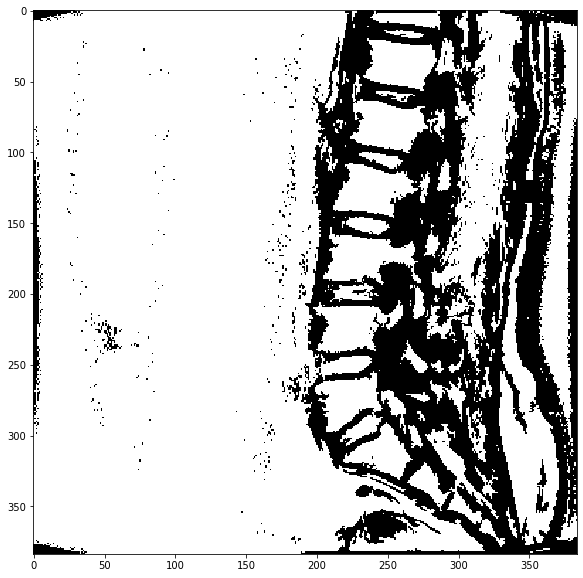

In [54]:
_, ax = plt.subplots(figsize=(10, 10))

ax.imshow(result_mask_bool[4], cmap='gray')

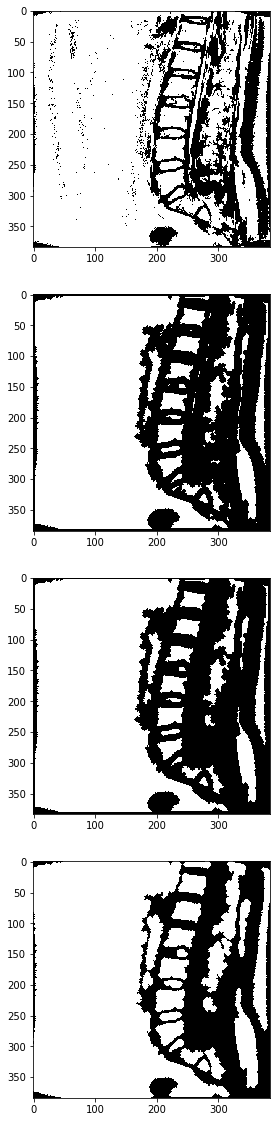

In [103]:
_, ax = plt.subplots(nrows=4, figsize=(10, 20))
tst_image = result_mask_bool[8]

ax[0].imshow(tst_image, cmap='gray')
for i in range(3):
    tst_image = binary_erosion(tst_image)
    tst_image = binary_fill_holes(tst_image)

ax[1].imshow(tst_image, cmap='gray')
tst_image = remove_small_objects(tst_image)
ax[2].imshow(tst_image, cmap='gray')
structure = np.array([[0, 1, 0], [1,1,1], [0,1,0]], dtype=np.uint8)
tst_image = binary_dilation(tst_image, iterations=3, structure=structure)
ax[3].imshow(tst_image, cmap='gray')

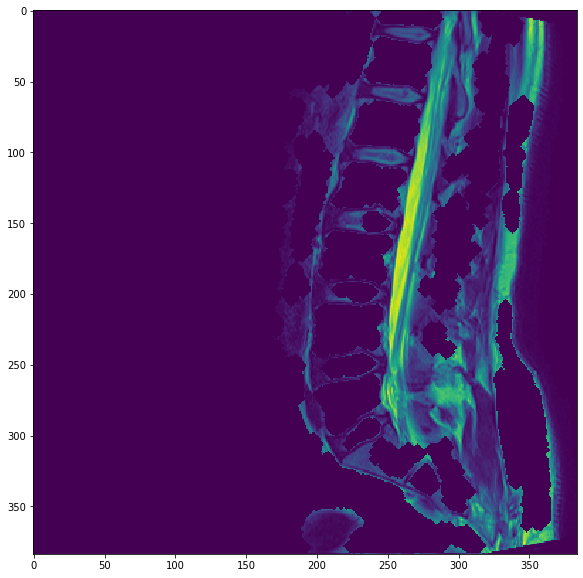

In [88]:
structure = np.array([[0,0,0]])

plt.subplots(figsize=(10, 10))
plt.imshow(original_data[8] * (~tst_image))

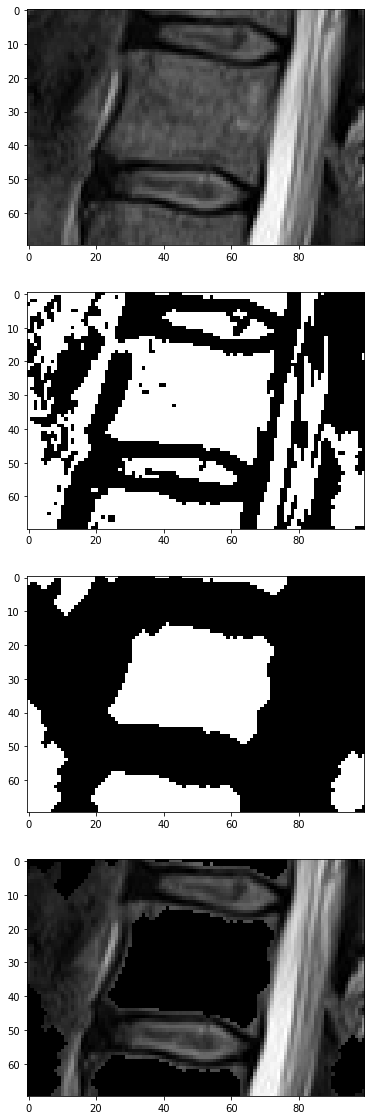

In [104]:
_, ax = plt.subplots(nrows=4, figsize=(10,20))

ax[0].imshow(original_data[8][50:120, 200:300], cmap='gray')
ax[1].imshow(result_mask_bool[8][50:120, 200:300], cmap='gray')
ax[2].imshow(tst_image[50:120, 200:300], cmap='gray')
ax[3].imshow((original_data[8] * (~tst_image))[50:120, 200:300], cmap='gray')

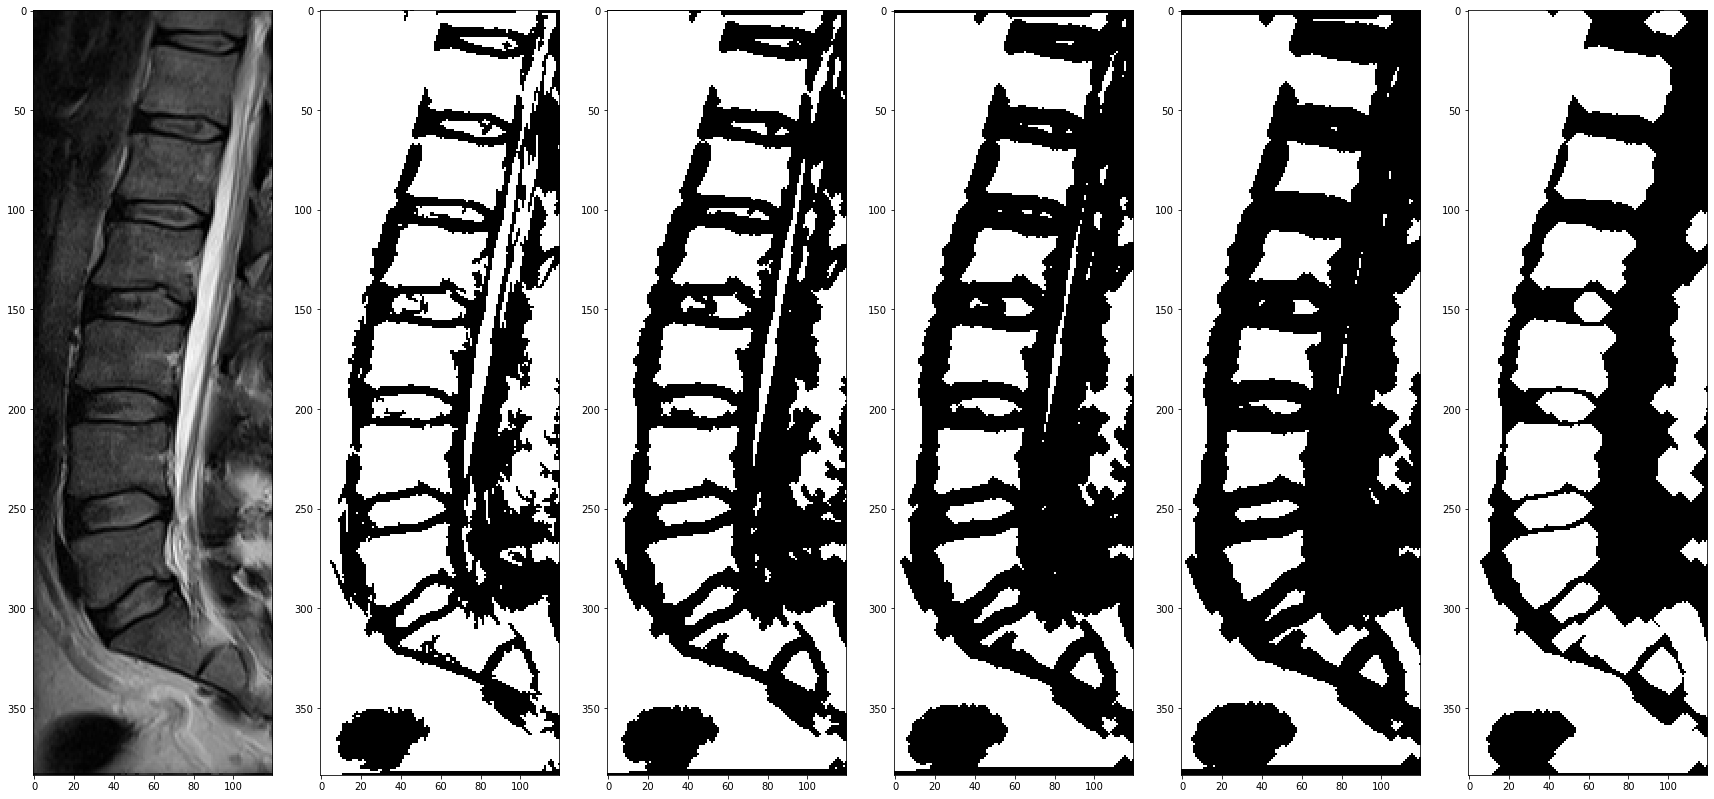

In [130]:
_, ax = plt.subplots(ncols=6, figsize=(30,15))
erosion_image = result_mask_bool[8]
erosion_image = binary_fill_holes(erosion_image)
ax[0].imshow(original_data[8][:, 180:300], cmap='gray')
for i in range(ax.shape[0] - 2):
    ax[i+1].imshow(erosion_image[:,  180:300], cmap='gray')
    erosion_image = binary_erosion(erosion_image)
    erosion_image = binary_fill_holes(erosion_image)

recovered_image = binary_dilation(erosion_image, iterations=5)
ax[-1].imshow(recovered_image[:,  180:300], cmap='gray')

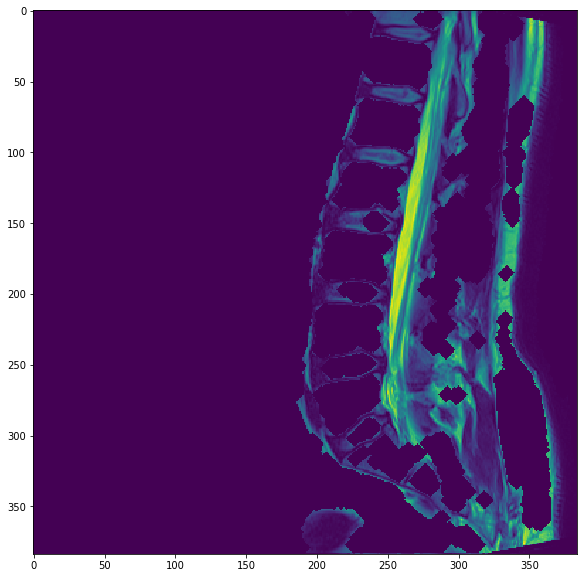

In [131]:
plt.subplots(figsize=(10,10))
plt.imshow(original_data[8] * (~recovered_image))
